<a href="https://colab.research.google.com/github/qwe366/My_hallym_resume/blob/master/Untitled2_crop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%cd /content
!git clone https://github.com/ultralytics/yolov5.git

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
%cd /content/yolov5/
!pip install -r requirements.txt

/content/yolov5


In [ ]:
from IPython.display import Image
import os

!python detect.py --weights /content/best.pt --img 416 --conf 0.5 --source "/content/test_data/pill10.jpg"

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.5, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=416, iou_thres=0.45, line_thickness=3, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='/content/test_data/pill10.jpg', update=False, view_img=False, weights=['/content/best.pt'])
YOLOv5 🚀 v5.0-76-g57b0d3a torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPS
image 1/1 /content/test_data/pill10.jpg: 416x416 1 oblong, Done. (0.009s)
Results saved to runs/detect/exp10
Done. (0.082s)


In [ ]:
import torch
model = torch.hub.load('ultralytics/yolov5', 'custom', path = '/content/best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
Fusing layers... 
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPS
Adding autoShape... 
YOLOv5 🚀 2021-5-10 torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)



In [ ]:
from PIL import Image
import tensorflow as tf
#from PIL import ImageOps
from matplotlib import pyplot as plt

Img = Image.open('/content/yolov5/runs/detect/exp10/pill10.jpg')
results = model(Img)
#results.save()

results.xyxy[0]

X1 = results.xyxy[0][0][0]
Y1 = results.xyxy[0][0][1]
X2 = results.xyxy[0][0][2]
Y2 = results.xyxy[0][0][3]

print('\n', X1)
print('\n', Y1)
print('\n', X2)
print('\n', Y2)

x1 = X1.item()
y1 = Y1.item()
x2 = X2.item()
y2 = Y2.item()

print('\n', x1)
print('\n', y1)
print('\n', x2)
print('\n', y2)

cropping_area = (x1+10, y1+30, x2-15, y2-15)
cropped_img = Img.crop(cropping_area)

#plt.savefig('cropped_img.jpg')
plt.imshow(cropped_img)
#print("Type is %s" % (type(cropped_img)))



 tensor(542.25000, device='cuda:0')

 tensor(645.75000, device='cuda:0')

 tensor(847.12500, device='cuda:0')

 tensor(847.12500, device='cuda:0')

 542.25

 645.75

 847.125

 847.125


In [ ]:
pip install pytesseract

In [ ]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


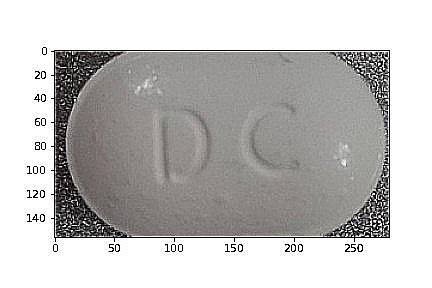

In [ ]:
import pytesseract
import cv2
import numpy as np
import os
import torch
from PIL import Image
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


image = cv2.imread('cropped_img.jpg')
#cv2_imshow(image)

#선명하게
kernel_sharpen = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
#[[0, -1, 0], [-1, 5, -1], [0, -1, 0]]
#kernel_sharpen = np.array([[0, -1, 0], [-1, 4.9, -1], [0, -1, 0]])
sharp_image = cv2.filter2D(image, -1, kernel_sharpen)

cv2_imshow(sharp_image)

filename = "{}.png".format(os.getpid())
cv2.imwrite(filename, sharp_image)

text = pytesseract.image_to_string(Image.open(filename),lang=None)
os.remove(filename)

In [ ]:
print(text)